In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os

os.chdir('/content/gdrive/MyDrive/2021_논문준비')

In [ ]:
series_all = pd.read_csv('S&P_170103_final.csv')

In [ ]:
series_all.head()

,date,snp,snp500,rv5,RV
0,2017-01-03,8.14,6.80,0.000035,0.005941
1,2017-01-04,8.80,7.40,0.000013,0.003641
2,2017-01-05,8.36,6.50,0.000012,0.003433
3,2017-01-06,9.13,6.80,0.000015,0.003869
4,2017-01-09,8.47,7.04,0.000008,0.002840


In [ ]:
series_all

,date,snp,snp500,rv5,RV
0,2017-01-03,8.14,6.80,0.000035,0.005941
1,2017-01-04,8.80,7.40,0.000013,0.003641
2,2017-01-05,8.36,6.50,0.000012,0.003433
3,2017-01-06,9.13,6.80,0.000015,0.003869
4,2017-01-09,8.47,7.04,0.000008,0.002840
...,...,...,...,...,...
904,2020-08-17,25.23,25.20,0.000008,0.002907
905,2020-08-18,29.00,25.76,0.000033,0.005748
906,2020-08-19,26.10,28.00,0.000030,0.005488
907,2020-08-20,25.23,26.32,0.000018,0.004251


rv5 : 5분 변동성  
RV : sqrt(rv5) 

In [ ]:
import matplotlib.pyplot as plt

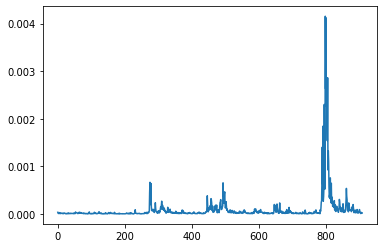

In [ ]:
plt.plot(series_all.rv5)

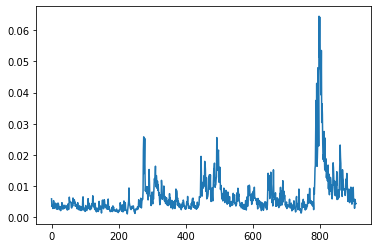

In [ ]:
plt.plot(series_all.RV)

In [ ]:
RV=series_all.RV

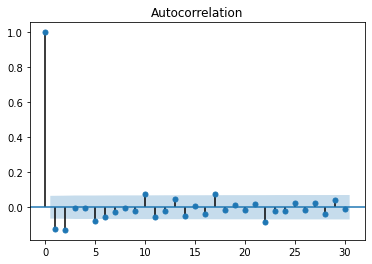

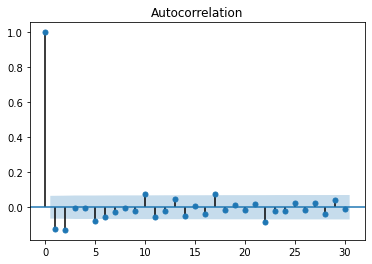

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
series = np.log(series_all.snp).diff(1).dropna()
plot_acf(series)

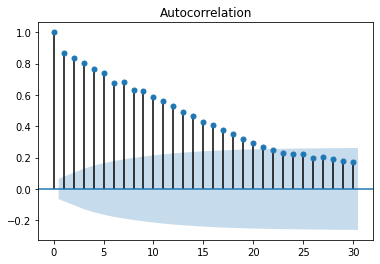

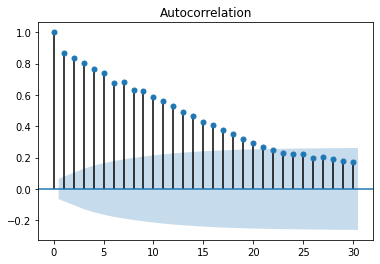

In [ ]:
plot_acf(RV)

RV의 장기기억성

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(RV)

(-4.071428040008977,
 0.0010793775619100797,
 9,
 899,
 {'1%': -3.4376448499903653,
  '10%': -2.568484710325773,
  '5%': -2.8647603105890442},
 -7740.601709763598)

## RV의 기술통계량

In [ ]:
RV.describe()

count    909.000000
mean       0.006715
std        0.006679
min        0.001104
25%        0.003265
50%        0.004716
75%        0.007599
max        0.064444
Name: RV, dtype: float64

In [ ]:
from scipy.stats import skew, kurtosis

# 왜도
skew(RV)


4.252681168898018

In [ ]:
# 첨도
kurtosis(RV, fisher=True)

24.73931143913172

{'boxes': [<matplotlib.lines.Line2D at 0x7f72f35606d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f72f3564790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f72f34ec7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f72f34ec290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f72f3560cd0>,
  <matplotlib.lines.Line2D at 0x7f72f3564250>]}

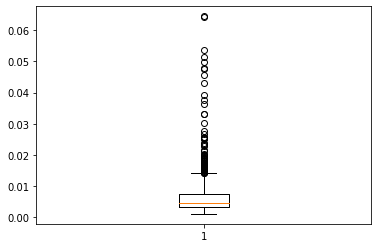

In [ ]:
plt.boxplot(RV)

## HAR(3)-RV

In [ ]:
RV

0      0.005941
1      0.003641
2      0.003433
3      0.003869
4      0.002840
         ...   
904    0.002907
905    0.005748
906    0.005488
907    0.004251
908    0.004413
Name: RV, Length: 909, dtype: float64

In [ ]:
rv_22 = RV.rolling(22).mean().dropna()[:-1].values
rv_5 = RV.rolling(5).mean()[21:-1].values
rv_1 = RV[21:-1].values

y = RV[22:].values

lm_data=pd.DataFrame({'RV':y, 'RV_1':rv_1, 'RV_5':rv_5, 'RV_22':rv_22})

In [ ]:
lm_data

,RV,RV_1,RV_5,RV_22
0,0.002837,0.004020,0.003949,0.003819
1,0.002499,0.002837,0.004002,0.003678
2,0.002756,0.002499,0.003606,0.003626
3,0.003490,0.002756,0.003330,0.003595
4,0.002516,0.003490,0.003120,0.003578
...,...,...,...,...
882,0.002907,0.005776,0.006365,0.006691
883,0.005748,0.002907,0.005808,0.006326
884,0.005488,0.005748,0.005031,0.006247
885,0.004251,0.005488,0.005014,0.006264


In [ ]:
import statsmodels.api as sm
x=lm_data[['RV_1', 'RV_5', 'RV_22']]
x = sm.add_constant(x)
y=lm_data['RV']

lm = sm.OLS(y, x)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RV   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1041.
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          2.55e-289
Time:                        04:42:49   Log-Likelihood:                 3846.7
No. Observations:                 887   AIC:                            -7685.
Df Residuals:                     883   BIC:                            -7666.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      3.623      0.000       0.000       0.001
RV_1           0.4618      0.041     11.355      0.000       0.382       0.542
RV_5           0.5266      0.054      9.720      0.000       0.420       0.633
RV_22         -0.0791      0.034     -2.297      0.022      -0.147      -0.012
==============================================================================
Omnibus:                      746.424   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50933.809
Skew:                           3.350   Prob(JB):                         0.00
Kurtosis:                      39.514   Cond. No.                         638.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:


rv_22_p = RV.rolling(22).mean().dropna().values[-1]
rv_5_p = RV.rolling(5).mean()[21:].values[-1]
rv_1_p = RV.values[-1]
pred_data=pd.DataFrame({'RV_1':rv_1_p, 'RV_5':rv_5_p, 'RV_22':rv_22_p},index=[0])


In [ ]:
X_pred=pd.concat([pd.DataFrame([1.0]),pred_data[['RV_1', 'RV_5', 'RV_22']]],axis=1)

In [ ]:
pd.DataFrame([1.0])

,0
0,1.0


In [ ]:
y_pred=results.predict(X_pred)

In [ ]:
y_pred

0    0.004575
dtype: float64

In [ ]:
y_train_har=results.predict(x)

#### IHAR : 추정 계수의 합이 1에 가까움. ADFtest 는 정상이나, GDF 검정 실시하면 비정상성 띄는 경향 
> 차분으로 IHAR 만들어줌

# AR(22)와 비교

In [ ]:
pip install statsmodels==0.12.2

In [ ]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

model = AutoReg(RV, lags=22)
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                     RV   No. Observations:                  909
Model:                    AutoReg(22)   Log Likelihood                3885.954
Method:               Conditional MLE   S.D. of innovations              0.003
Date:                Tue, 20 Apr 2021   AIC                            -11.546
Time:                        04:44:26   BIC                            -11.416
Sample:                            22   HQIC                           -11.496
                                  909                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.000      3.401      0.001       0.000       0.001
RV.L1          0.5490      0.034     16.374      0.000       0.483       0.615
RV.L2          0.2192      0.038      5.731      0.000       0.144       0.294
RV.L3          0.1401      0.039      3.598      0.000       0.064       0.216
RV.L4          0.0282      0.039      0.718      0.473      -0.049       0.105
RV.L5          0.0564      0.039      1.438      0.151      -0.021       0.133
RV.L6         -0.2028      0.039     -5.161      0.000      -0.280      -0.126
RV.L7          0.1708      0.040      4.283      0.000       0.093       0.249
RV.L8         -0.0981      0.040     -2.435      0.015      -0.177      -0.019
RV.L9          0.1436      0.040      3.549      0.000       0.064       0.223
RV.L10        -0.0297      0.041     -0.730      0.466      -0.110       0.050
RV.L11         0.0230      0.041      0.565      0.572      -0.057       0.103
RV.L12        -0.0425      0.041     -1.044      0.296      -0.122       0.037
RV.L13        -0.0101      0.041     -0.247      0.805      -0.090       0.070
RV.L14        -0.0191      0.040     -0.473      0.636      -0.098       0.060
RV.L15         0.0002      0.040      0.006      0.995      -0.079       0.079
RV.L16         0.0167      0.040      0.418      0.676      -0.062       0.095
RV.L17         0.0229      0.039      0.582      0.561      -0.054       0.100
RV.L18        -0.0145      0.039     -0.369      0.712      -0.092       0.063
RV.L19        -0.0272      0.039     -0.692      0.489      -0.104       0.050
RV.L20        -0.0174      0.039     -0.445      0.657      -0.094       0.059
RV.L21        -0.0439      0.038     -1.143      0.253      -0.119       0.031
RV.L22         0.0522      0.034      1.550      0.121      -0.014       0.118
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.2066           -0.0000j            1.2066           -0.5000
AR.2            -1.0391           -0.3708j            1.1033           -0.4454
AR.3            -1.0391           +0.3708j            1.1033            0.4454
AR.4            -0.9575           -0.5884j            1.1238           -0.4123
AR.5            -0.9575           +0.5884j            1.1238            0.4123
AR.6            -0.7335           -0.8925j            1.1553           -0.3595
AR.7            -0.7335           +0.8925j            1.1553            0.3595
AR.8            -0.4236           -1.0659j            1.1469           -0.3102
AR.9            -0.4236           +1.0659j            1.1469            0.3102
AR.10           -0.1246           -1.1492j            1.1559           -0.2672
AR.11           -0.1246           +1.1492j            1.1559            0.2672
AR

In [ ]:
model_fit.predict(908)

908    0.004514
dtype: float64

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(RV, order=(22,0,0))
fit  = model.fit()

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     RV   No. Observations:                  909
Model:                ARIMA(22, 0, 0)   Log Likelihood                3990.929
Date:                Tue, 20 Apr 2021   AIC                          -7933.857
Time:                        04:44:41   BIC                          -7818.361
Sample:                             0   HQIC                         -7889.758
                                - 909                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.002      3.516      0.000       0.003       0.010
ar.L1          0.5490      0.020     27.435      0.000       0.510       0.588
ar.L2          0.2192      0.022     10.007      0.000       0.176       0.262
ar.L3          0.1401      0.021      6.582      0.000       0.098       0.182
ar.L4          0.0282      0.024      1.173      0.241      -0.019       0.075
ar.L5          0.0564      0.029      1.971      0.049       0.000       0.113
ar.L6         -0.2028      0.028     -7.131      0.000      -0.258      -0.147
ar.L7          0.1708      0.033      5.195      0.000       0.106       0.235
ar.L8         -0.0981      0.027     -3.581      0.000      -0.152      -0.044
ar.L9          0.1436      0.030      4.747      0.000       0.084       0.203
ar.L10        -0.0297      0.033     -0.903      0.367      -0.094       0.035
ar.L11         0.0230      0.035      0.663      0.507      -0.045       0.091
ar.L12        -0.0425      0.032     -1.342      0.180      -0.105       0.020
ar.L13        -0.0101      0.042     -0.242      0.809      -0.092       0.072
ar.L14        -0.0191      0.033     -0.586      0.558      -0.083       0.045
ar.L15         0.0002      0.034      0.007      0.995      -0.066       0.067
ar.L16         0.0167      0.030      0.558      0.577      -0.042       0.075
ar.L17         0.0229      0.032      0.713      0.476      -0.040       0.086
ar.L18        -0.0145      0.034     -0.421      0.674      -0.082       0.053
ar.L19        -0.0272      0.033     -0.833      0.405      -0.091       0.037
ar.L20        -0.0174      0.036     -0.477      0.633      -0.089       0.054
ar.L21        -0.0439      0.033     -1.312      0.189      -0.109       0.022
ar.L22         0.0522      0.031      1.700      0.089      -0.008       0.112
sigma2      8.971e-06   2.07e-07     43.297      0.000    8.57e-06    9.38e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             26218.79
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               5.76   Skew:                             2.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_fit.predict(908)

908    0.004514
dtype: float64

autoreg 가 더 빠르게 나오는 경향 결과값은 ARIMA 와 같음

# GARCH 로 추정해보기

In [ ]:
snp=pd.read_csv('S&P 500 내역.csv')

In [ ]:
snp

,date,open
0,2017-01-03,2251.57
1,2017-01-04,2261.60
2,2017-01-05,2268.18
3,2017-01-06,2271.14
4,2017-01-09,2273.59
...,...,...
1072,2021-04-08,4089.95
1073,2021-04-09,4096.11
1074,2021-04-12,4124.71
1075,2021-04-13,4130.10


In [ ]:
snp2 = pd.merge(snp, series_all, how ='right')

In [ ]:
snp2['rt']=np.log(snp2.open).diff(1)
snp2.rt[0]=np.log(2251.57)-np.log(2251.61)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
snp2

,date,open,snp,snp500,rv5,RV,rt
0,2017-01-03,2251.57,8.14,6.80,0.000035,0.005941,-0.000018
1,2017-01-04,2261.60,8.80,7.40,0.000013,0.003641,0.004445
2,2017-01-05,2268.18,8.36,6.50,0.000012,0.003433,0.002905
3,2017-01-06,2271.14,9.13,6.80,0.000015,0.003869,0.001304
4,2017-01-09,2273.59,8.47,7.04,0.000008,0.002840,0.001078
...,...,...,...,...,...,...,...
904,2020-08-17,3380.86,25.23,25.20,0.000008,0.002907,0.003615
905,2020-08-18,3387.04,29.00,25.76,0.000033,0.005748,0.001826
906,2020-08-19,3392.51,26.10,28.00,0.000030,0.005488,0.001614
907,2020-08-20,3360.48,25.23,26.32,0.000018,0.004251,-0.009486


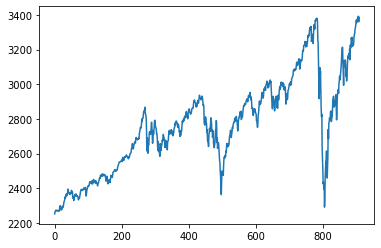

In [ ]:
plt.plot(snp2.open)

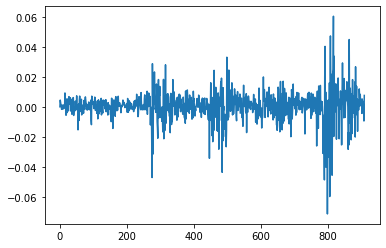

In [ ]:
plt.plot(snp2.rt)

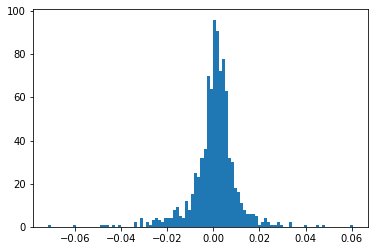

In [ ]:
plt.hist(snp2.rt,bins=100);

In [ ]:
skew(snp2.rt)

-0.8885012731041579

In [ ]:
kurtosis(snp2.rt)

8.75803012180271

In [ ]:
!pip install arch

In [ ]:
from arch import arch_model

model = arch_model(snp2.rt, mean='Zero', vol='GARCH', p=1, q=1)
model_fit = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -3167.536440767085
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3167.5364381263284
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1


/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:317: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000103. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                3167.54
Distribution:                  Normal   AIC:                          -6329.07
Method:            Maximum Likelihood   BIC:                          -6314.64
                                        No. Observations:                  909
Date:                Tue, Apr 20 2021   Df Residuals:                      909
Time:                        04:44:45   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.0638e-06  7.035e-11  2.934e+04      0.000 [2.064e-06,2.064e-06]
alpha[1]       0.2000  4.194e-02      4.768  1.857e-06     [  0.118,  0.282]
beta[1]        0.7800  3.562e-02     21.896 2.840e-106     [  0.710,  0.850]
============================================================================

Covariance estimator: robust
"""

In [ ]:
sigmahat=model_fit.conditional_volatility

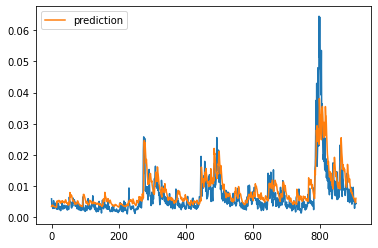

In [ ]:
plt.plot(series_all.RV)
plt.plot(sigmahat, label='prediction')
plt.legend()

t분포로 해봄

In [ ]:
model_t = arch_model(snp2.rt, mean='Zero', vol='GARCH', p=1, q=1,dist='StudentsT')
model_fit_t = model_t.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -3205.9985530183167
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3205.998553009989
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 1


/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:317: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000103. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [ ]:
model_fit_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                           rt   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:                3206.00
Distribution:      Standardized Student's t   AIC:                          -6404.00
Method:                  Maximum Likelihood   BIC:                          -6384.75
                                              No. Observations:                  909
Date:                      Tue, Apr 20 2021   Df Residuals:                      909
Time:                              04:44:45   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.0638e-06  1.244e-08    165.861      0.000 [2.039e-06,2.088e-06]
alpha[1]       0.2000  3.375e-02      5.926  3.101e-09     [  0.134,  0.266]
beta[1]        0.7800  2.869e-02     27.185 9.662e-163     [  0.724,  0.836]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             5.5545  6.276e-02     88.505      0.000 [  5.432,  5.678]
========================================================================

Covariance estimator: robust
"""

In [ ]:
sigmahat2=model_fit_t.conditional_volatility

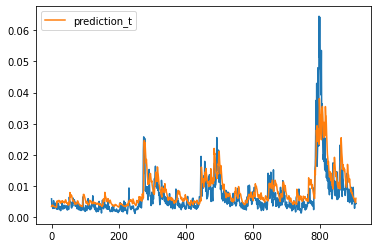

In [ ]:
plt.plot(series_all.RV)
plt.plot(sigmahat2, label='prediction_t')
plt.legend()

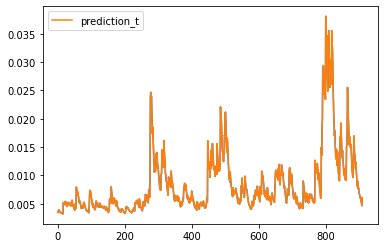

In [ ]:
plt.plot(sigmahat)
plt.plot(sigmahat2, label='prediction_t')
plt.legend()

차이 없는것 같은데..

## HAR GARCH 비교

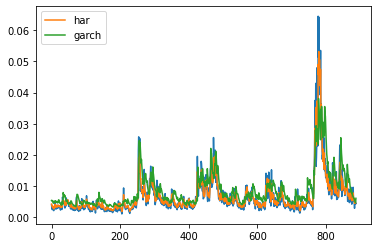

In [ ]:
plt.plot(series_all.RV[21:].values)
plt.plot(y_train_har.values,label='har')
plt.plot(sigmahat[21:].values,label='garch')
plt.legend()